# Project 1: Pricing Derivatives
In this Project I implement and test the Black-Scholes formulae for pricing various options. Then I perform various consistency checks on my implementation. 

Prices will be a function of time-to-maturity $T$, continuously compounding rate $r$, dividend rate $d$, strike $K$, spot $S$. and volatility $\sigma$
### Zero-Coupon Bond
The price of a zero-coupon bond is 
$$P = e^{-rT}$$
### Forward Contract
The price of a forward contract is $$ P = e^{-rT}\left(e^{(r-d)T}S-K\right)$$

### Call and Put Options
The prices of Call and Put options are respectively
$$C = Se^{-dT}N(d_1) - K e^{-rT} N(d_2),$$
$$P = K e^{-rT} N(-d_2) - Se^{-dT}N(-d_1),$$
where 
$$d_1 = \frac{\log(\frac{S}{K}) + T(r-d+\frac{\sigma^2}{2})}{\sigma \sqrt{T}},$$
$$d_2 = d_1 - \sigma \sqrt{T},$$
and $N(x)$ is the standard normal cumulative distribution function:
$$N(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^x e^{\frac{-t^2}{2}}dt.$$

### Digital Calls and Puts
The prices of digital calls and puts are respectively
$$C = e^{-rT}N(d_2), $$
$$P = e^{-rT}N(-d_2).$$

## Consistency Checks
First we check Put-Call parity. The difference between the price of a call $C$ and a put $P$ should be equal to the value of a forward $F$ (all with the same strike, and time-to-maturity):
$$C-P = F.$$ 
We initialise random values of the input variables and compare the two values.

In [19]:
#initialise random values for pricing inputs
from Pricing import CallPrice, PutPrice, ForwardPrice
import random
T, r, d, K, S, vol = [random.uniform(0, 10),
                      random.uniform(0,1),
                      random.uniform(0,1),
                      random.uniform(0,10),
                      random.uniform(0,10),
                      random.uniform(0,10)]
#set error tolerance
tol = 1e-15
#checking put-call parity. return True if satisfied
PutCallParity = abs(CallPrice(S,K,T,r,d,vol) - PutPrice(S,K,T,r,d,vol) - ForwardPrice(S,K,T,r,d)) < tol 
print('Put-Call parity: ', PutCallParity)

Put-Call parity:  True


Next we check that the price of a call option is monotone decreasing with strike. We alse see that the call option price is a convex function of strike.

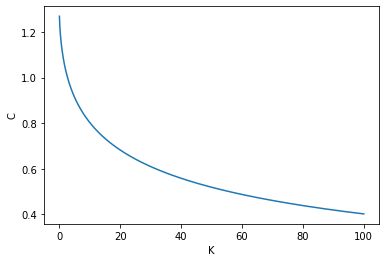

In [44]:
import matplotlib.pyplot as plt
import numpy as np
strike_range = np.arange(0.01,100,0.01)
call_prices = np.zeros(len(strike_range))
for i, k in enumerate(strike_range):
    call_prices[i] = CallPrice(S,k,T,r,d,vol)
plt.xlabel('K')
plt.ylabel('C')
plt.plot(strike_range,call_prices)
plt.show()


Our next check will be that a call option price should be between $Se^{-dT}$ and $Se^{-dT}-Ke^{-rT}$ for all input values.

In [41]:
from math import exp
bounds_check = CallPrice(S,K,T,r,d,vol)< S*exp(-d*T) and CallPrice(S,K,T,r,d,vol)>S*exp(-d*T)-K*exp(-r*T)
print('Call price bounds satisfied: ',bounds_check)

Call price bounds satisfied:  True


Now we check that the call price is monotone increasing in volatility.

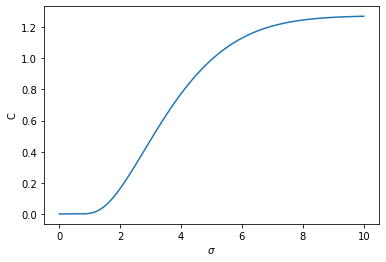

In [42]:
vol_range = np.arange(0.01,10,0.001)
call_prices = np.zeros(len(vol_range))
for i, v in enumerate(vol_range):
    call_prices[i] = CallPrice(S,K,T,r,d,v)
plt.xlabel(r'$\sigma$')
plt.ylabel('C')
plt.plot(vol_range,call_prices)
plt.show()

If $d=0$, the call option price should be increasing with $T$.

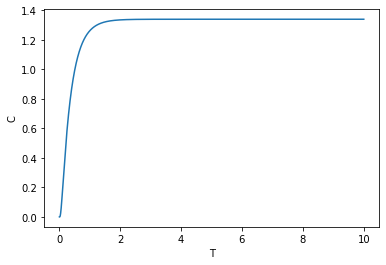

In [43]:
T_range = np.arange(0.01,10,0.001)
call_prices = np.zeros(len(vol_range))
for i, t in enumerate(T_range):
    call_prices[i] = CallPrice(S,K,t,r,0,vol)
plt.xlabel('T')
plt.ylabel('C')
plt.plot(T_range,call_prices)
plt.show()

Now we check that the price of a call-spread approximates the price of a digital-call option. The payoff of a call spread that approximates a digital call of strike $K$ is
$$\frac{(S-(K-\epsilon))^+ - (S-(K+\epsilon))^+}{2\epsilon},$$
with $\epsilon$ small.

In [56]:
from Pricing import DigitalCallPrice
eps = 0.000000001
K_1 = K+eps
K_2 = K-eps
K_mid = 0.5*(K_1 + K_2)
CallSpread = (CallPrice(S,K_2,T,r,d,vol) - CallPrice(S,K_1,T,r,d,vol))/(2*eps)
DigitalCall = DigitalCallPrice(S,K_mid,T,r,d,vol)
print('Difference in Call spread and Digital Call is ',abs(CallSpread - DigitalCall))

Difference in Call spread and Digital Call is  8.765227214185822e-08


Finally we check that the sum of the prices of a digital call and digital put is the same as the price of a zero-coupon bond. 

In [59]:
from Pricing import DigitalPutPrice, BondPrice
print('Sum of digital call and put is bond:',abs(DigitalCallPrice(S,K,T,r,d,vol) + DigitalPutPrice(S,K,T,r,d,vol) - BondPrice(T,r))<tol)

Sum of digital call and put is bond: True


We find that our results are consistent with all of our checks, and that the pricing formulae have all been implemented correctly.